# **Fundamentos de inteligencia artificial**
### Mg. Ing. Emerson Maximo Asto Rodriguez

La base de datos mnist https://en.wikipedia.org/wiki/MNIST_database

### Red neuronal artificial (ANN)

In [28]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.utils import to_categorical
import matplotlib.pyplot as plt

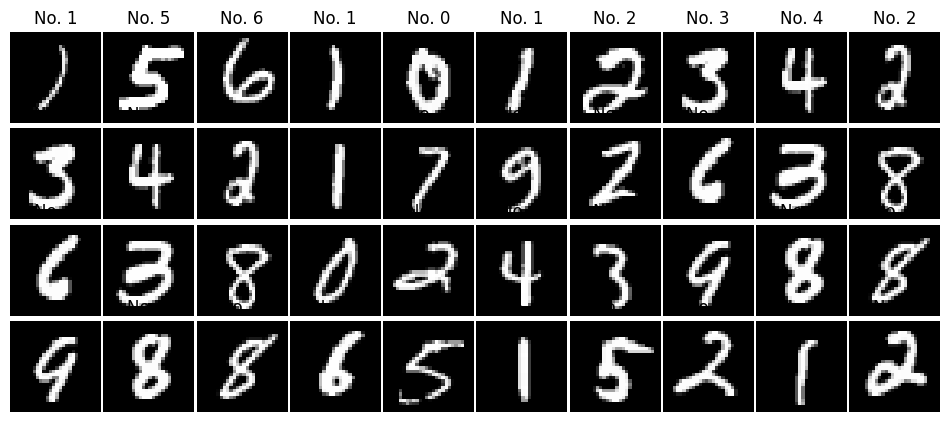

In [29]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#MOSTRAR DIGITOS
rand_14 = np.random.randint(0, train_images.shape[0],40)
sample_digits = train_images[rand_14]
sample_labels = train_labels[rand_14]

num_rows, num_cols = 4, 10
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01},
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()

In [30]:
# Normalizado
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Arquitectura del modelo
model = Sequential([
  Input(shape=(784,)),
  Dense(200, activation='relu'),
  Dropout(0,5),
  Dense(200, activation='relu'),
  Dropout(0,5),
  Dense(10, activation='softmax'),
])

# Compilando el modelo
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)


In [31]:
# Entrenado el modelo
history = model.fit(
  train_images,
  to_categorical(train_labels),
  validation_data=(test_images, to_categorical(test_labels)),
  epochs=20,
  batch_size=32,
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8914 - loss: 0.3623 - val_accuracy: 0.9644 - val_loss: 0.1169
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9708 - loss: 0.0916 - val_accuracy: 0.9717 - val_loss: 0.0977
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9819 - loss: 0.0574 - val_accuracy: 0.9782 - val_loss: 0.0696
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0430 - val_accuracy: 0.9751 - val_loss: 0.0894
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9891 - loss: 0.0340 - val_accuracy: 0.9787 - val_loss: 0.0749
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9914 - loss: 0.0267 - val_accuracy: 0.9761 - val_loss: 0.0868
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9925 - loss: 0.0219 - val_accuracy: 0.9766 - val_loss: 0.1005
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0198 -

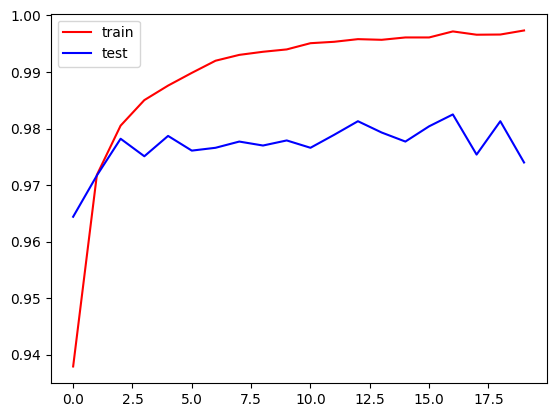

In [32]:
plt.plot(history.history["accuracy"], "r", label="train")
plt.plot(history.history["val_accuracy"], "b", label="test")
plt.legend()
plt.show()

In [15]:
from keras.models import load_model
from pickle import dump, load

model.save('my_model.h5')
del model

model = load_model('my_model.h5')

![Metricas](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png)

In [20]:
model.predict(test_images) > 0.5

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[False, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
predicciones = (model.predict(test_images) > 0.5).astype("int32")
print(predicciones)
print(predicciones.argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[7 2 1 ... 4 5 6]


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(test_labels, predicciones.argmax(axis=1))

array([[ 965,    0,    1,    1,    3,    1,    5,    1,    2,    1],
       [   2, 1119,    1,    2,    0,    1,    1,    1,    8,    0],
       [   6,    0, 1014,    2,    4,    0,    1,    3,    2,    0],
       [   3,    1,    6,  980,    0,    5,    0,    2,    6,    7],
       [   2,    0,    6,    1,  951,    0,    4,    1,    1,   16],
       [   2,    0,    1,    8,    1,  852,    6,    1,    7,   14],
       [   3,    4,    3,    1,   10,    5,  928,    0,    4,    0],
       [   3,    1,    8,    2,    4,    1,    0,  992,    4,   13],
       [   3,    0,    1,    1,    3,    1,    1,    1,  962,    1],
       [   1,    2,    0,    5,    4,    3,    1,    2,    4,  987]])

In [23]:
print(classification_report(test_labels, predicciones.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.97       958
           7       0.99      0.96      0.98      1028
           8       0.96      0.99      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.97      0.98     10000



### Red neuronal convolucional (CNN)

![](https://cdn-images-1.medium.com/max/1000/1*T0ezk_Sch1f17o6QMBHeXw.png)

In [36]:
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [37]:
def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()

    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))

    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [38]:
def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')

    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

In [43]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [40]:
#VALIDACION CRUZADA
def evaluate_model(dataX, dataY, n_folds=3):
    scores, histories = list(), list()

    kfold = KFold(n_folds, shuffle=True, random_state=1)

    for train_idx, test_idx in kfold.split(dataX):
        model = define_model()

        trainX, trainY, testX, testY = dataX[train_idx], dataY[train_idx], dataX[test_idx], dataY[test_idx]

        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

        _, acc = model.evaluate(testX, testY, verbose=0)
        print(">Accuracy %.3f" % (acc * 100.0))

        scores.append(acc)
        histories.append(history)
    return scores, histories

In [41]:
def summarize_diagnostics(histories):
    plt.figure(figsize=(12,8))
    ax1 = plt.subplot(2,1,1)
    ax2 = plt.subplot(2,1,2)

    for i in range(len(histories)):
        # plot loss
        ax1.plot(histories[i].history['loss'], color='blue', label=('train'+str(i)))
        ax1.plot(histories[i].history['val_loss'], color='orange', label=('test'+str(i)))

        # plot accuracy
        ax2.plot(histories[i].history['accuracy'], color='blue', label=('train'+str(i)))
        ax2.plot(histories[i].history['val_accuracy'], color='orange', label=('test'+str(i)))

    ax1.set_title('Cross Entropy Loss')
    ax1.legend()
    ax2.set_title('Classification Accuracy')
    ax2.legend()
    plt.show()


def summarize_performance(scores):
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	plt.boxplot(scores)
	plt.show()

In [44]:
trainX, trainY, testX, testY = load_dataset()

# preprocesamiento
trainX, testX = prep_pixels(trainX, testX)

# creación modelo
model = define_model()

history = model.fit(trainX, trainY, epochs=15, batch_size=32, validation_data=(testX, testY), verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8521 - loss: 0.4822 - val_accuracy: 0.9677 - val_loss: 0.1048
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9683 - loss: 0.1042 - val_accuracy: 0.9781 - val_loss: 0.0642
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9816 - loss: 0.0590 - val_accuracy: 0.9822 - val_loss: 0.0531
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9886 - loss: 0.0401 - val_accuracy: 0.9836 - val_loss: 0.0495
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9914 - loss: 0.0290 - val_accuracy: 0.9816 - val_loss: 0.0516
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy: 0.9841 - val_loss: 0.0522
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9945 - loss: 0.0170 - val_accuracy: 0.9862 - val_loss: 0.0431
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9965 - loss: 0.0122 - 

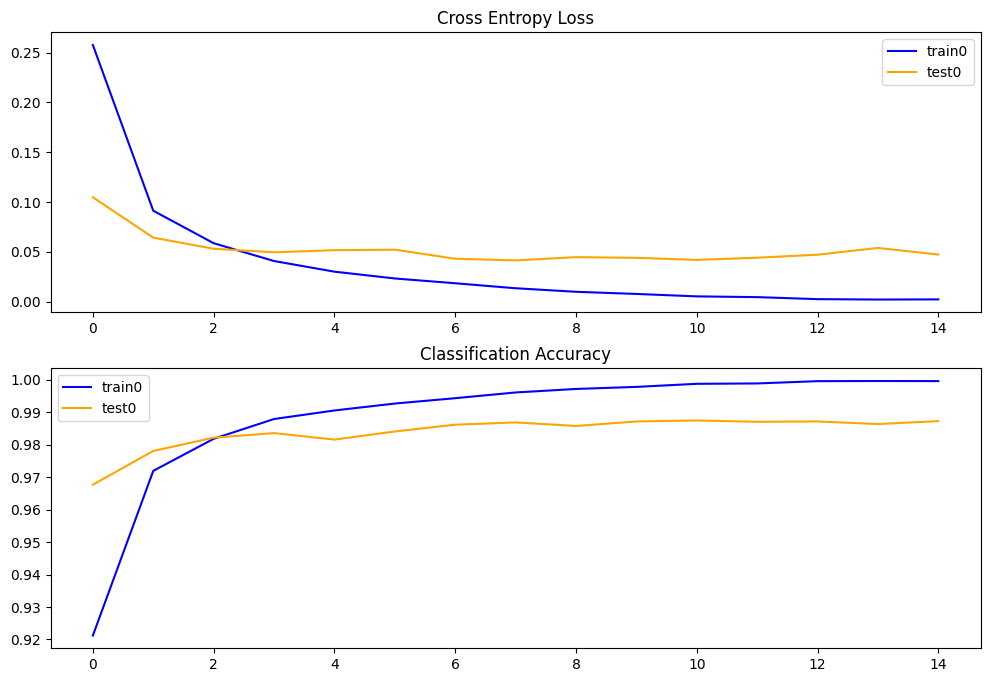

In [46]:
# Ploteo de curvas
summarize_diagnostics([history,])

In [47]:
def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()

	# preprocesamiento
	trainX, testX = prep_pixels(trainX, testX)

	# evaluacion del modelo
	scores, histories = evaluate_model(trainX, trainY)

	# Ploteo de curvas
	summarize_diagnostics(histories)

	# Ploteo de rendimiento
	summarize_performance(scores)

>Accuracy 98.325
>Accuracy 98.145
>Accuracy 98.410


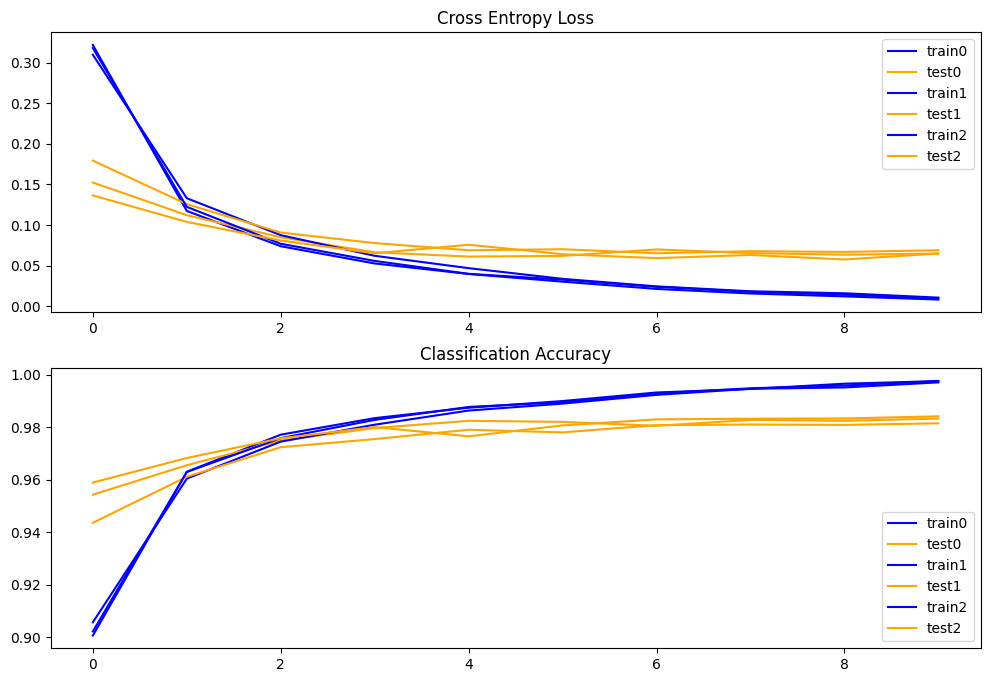

Accuracy: mean=98.293 std=0.110, n=3


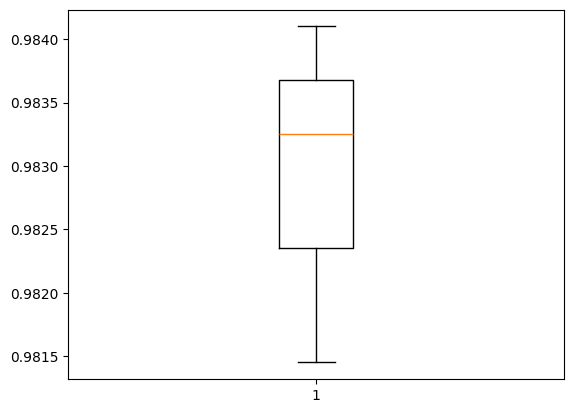

In [48]:
run_test_harness()